In [157]:
#Import some essentials
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

In [158]:
#Set path and Import data
df = pd.read_csv ('hmda_2017_il_all-records_labels_trimmed.csv')

In [159]:
#Clean the data

#Drop rows missing income information
clean_df = df.dropna(subset=['applicant_income_000s'])
print(len(df), len(clean_df))

#Drop rows missing loan amount information
clean_df = clean_df.dropna(subset=['loan_amount_000s'])
print(len(df), len(clean_df))

#Drop rows missing action taken
clean_df = clean_df.dropna(subset=['action_taken'])
print(len(df), len(clean_df))

#Drop rows missing applicant race
clean_df = clean_df.dropna(subset=['applicant_race_1'])
print(len(df), len(clean_df))

#Drop rows missing the denial reason--not doing this (many loans were not denied and we want to keep those in the data)
#clean_df = clean_df.dropna(subset=['denial_reason_1'])
#print(len(df), len(clean_df))

#Remove records where race was not provided
clean_df = clean_df[clean_df["applicant_race_1"] <6]
print(len(df), len(clean_df))

#Remove records where application wasn't either originated, approved, or rejected
clean_df = clean_df[clean_df["action_taken"] <4]
print(len(df), len(clean_df))

#Merge Loan originated and Loan approved but not accepted status--only want to know originated and rejected
#clean_df[clean_df["action_taken"] == 2] = 1
clean_df['action_taken'] = clean_df['action_taken'].replace([2],1)
print(len(df), len(clean_df))

print('5--White', len(clean_df[clean_df["applicant_race_1"] ==5]))
print('3--Black', len(clean_df[clean_df["applicant_race_1"] ==3]))
print('2--Asian', len(clean_df[clean_df["applicant_race_1"] ==2]))
print('1--Native American', len(clean_df[clean_df["applicant_race_1"] ==1]))
print('4--Pacific Islander', len(clean_df[clean_df["applicant_race_1"] ==4]))
print('Original 1--Native American', len(df[df["applicant_race_1"] ==1]))


502511 436928
502511 435990
502511 435990
502511 435990
502511 387317
502511 296539
502511 296539
5--White 250422
3--Black 24964
2--Asian 18865
1--Native American 1445
4--Pacific Islander 843
Original 1--Native American 2061


In [160]:
#A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
#Describe what the 5 variables mean in the dataset (Chapter 1).

#1)loan_amount_000s--The amount the applicant wants to borrow (in thousands)

#2)action_taken--What became of the loan:
    #Application withdrawn by applicant	4
    #Loan originated	1
    #Application denied by financial institution	3
    #Loan purchased by the institution	6
    #Application approved but not accepted	2
    #File closed for incompleteness	5
    #Preapproval request denied by financial institution	7
    #Preapproval request approved but not accepted	8

#3)applicant_race_1--The applicant's self reported race
    #American Indian or Alaska Native	1
    #Asian	2
    #Black or African American	3
    #Native Hawaiian or Other Pacific Islander	4
    #White	5
    #Information not provided by applicant in mail, Internet, or telephone application	6
    #Not applicable	7

#4)applicant_income_000s--The applicant's annual income

#5)denial_reason_1--why the loan was denied (blank if it wasn't denied or if it was net completed)
    #Debt-to-income ratio	1
    #Employment history	2
    #Credit history	3
    #Collateral	4
    #Insufficient cash (downpayment, closing costs)	5
    #Unverifiable information	6
    #Credit application incomplete	7
    #Mortgage insurance denied	8
    #Other	9



Loan amount outliers exists--need to remove


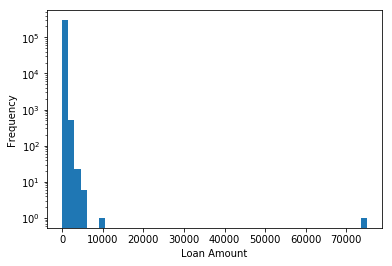

In [161]:
#Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

import matplotlib.pyplot as plt

plt.hist(clean_df['loan_amount_000s'], density=False, bins = 50, log = True)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Loan Amount');

print('Loan amount outliers exists--need to remove')




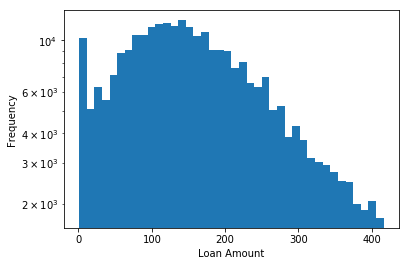

In [162]:
#Assuming that risk criteria are different for jumbo loans (any loan greater than $417K, so excluding any loans > 417K)
clean_df = clean_df[clean_df["loan_amount_000s"] <417]


plt.hist(clean_df['loan_amount_000s'], density=False, bins = 40, log = True)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Loan Amount');


1--Loan Approved
3--Loan Denied


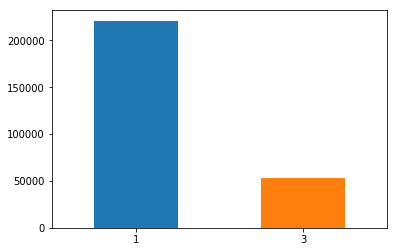

In [163]:
#Histogram of action taken frequency--using bar chart instead of histogram because of categorical values


clean_df['action_taken'].value_counts().plot.bar(x='Action Taken', y='Frequency', rot=0)
print('1--Loan Approved')
print('3--Loan Denied')

5--White 231321
3--Black 24364
2--Asian 16341
1--Native American 1417
4--Pacific Islander 786


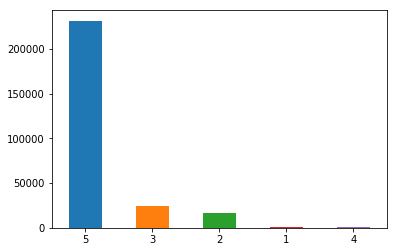

In [164]:
#Bar chart of applicant race (using bar instead of histogram because of categorical value)

clean_df['applicant_race_1'].value_counts().plot.bar(rot=0)
print('5--White', len(clean_df[clean_df["applicant_race_1"] ==5]))
print('3--Black', len(clean_df[clean_df["applicant_race_1"] ==3]))
print('2--Asian', len(clean_df[clean_df["applicant_race_1"] ==2]))
print('1--Native American', len(clean_df[clean_df["applicant_race_1"] ==1]))
print('4--Pacific Islander', len(clean_df[clean_df["applicant_race_1"] ==4]))

1--Debt-to-income ratio
3--Credit history
4--Collateral
7--Credit application incomplete
9--Other
6--Unverifiable information
5--Insufficient cash (downpayment, closing costs)
2--Employment history
8--Mortgage insurance denied


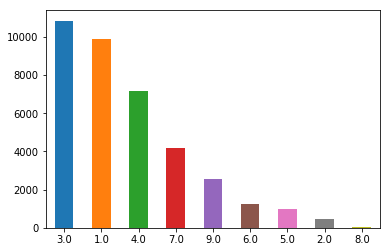

In [165]:
#Bar chart of denial reason (using bar instead of histogram because of categorical value)

clean_df['denial_reason_1'].value_counts().plot.bar(rot=0)
print('1--Debt-to-income ratio')
print('3--Credit history')
print('4--Collateral')
print('7--Credit application incomplete')
print('9--Other')
print('6--Unverifiable information')
print('5--Insufficient cash (downpayment, closing costs)')
print('2--Employment history')
print('8--Mortgage insurance denied')


Income amount outliers exists--need to remove


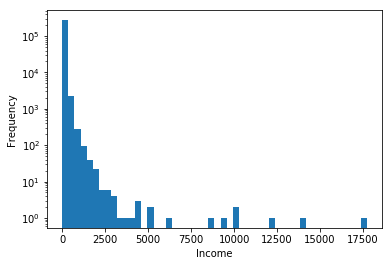

In [166]:
#Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

plt.hist(clean_df['applicant_income_000s'], density=False, bins = 50, log = True)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Income');

print('Income amount outliers exists--need to remove')


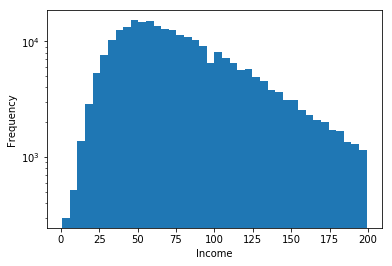

In [167]:
#Removing high income outliers--Removing incomes > $200K (amount arbitrarily chosen to leave more typical earners)
clean_df = clean_df[clean_df["applicant_income_000s"] <200]


plt.hist(clean_df['applicant_income_000s'], density=False, bins = 40, log = True)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Income');

In [210]:
#Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

print('Loan approval rates--')

#print('White: ')
#print('All applicants: ', len(clean_df[clean_df["applicant_race_1"] ==5]))
white_df = clean_df[clean_df["applicant_race_1"] ==5]
#print('Approved applicants: ', len(white_df[white_df["action_taken"] ==1]))
print('White Approval rate: ', round(len(white_df[white_df["action_taken"] ==1]) / len(clean_df[clean_df["applicant_race_1"] ==5]),3))

#print('Black: ')
#print('All applicants: ', len(clean_df[clean_df["applicant_race_1"] ==3]))
black_df = clean_df[clean_df["applicant_race_1"] ==3]
#print('Approved applicants: ', len(black_df[black_df["action_taken"] ==1]))
print('Black Approval rate: ', round(len(black_df[black_df["action_taken"] ==1]) / len(clean_df[clean_df["applicant_race_1"] ==3]),3))

#print('Asian: ')
#print('All applicants: ', len(clean_df[clean_df["applicant_race_1"] ==2]))
asian_df = clean_df[clean_df["applicant_race_1"] ==2]
#print('Approved applicants: ', len(asian_df[asian_df["action_taken"] ==1]))
print('Asian Approval rate: ', round(len(asian_df[asian_df["action_taken"] ==1]) / len(clean_df[clean_df["applicant_race_1"] ==2]),3))

#print('Pacific Islander: ')
#print('All applicants: ', len(clean_df[clean_df["applicant_race_1"] ==4]))
island_df = clean_df[clean_df["applicant_race_1"] ==4]
#print('Approved applicants: ', len(island_df[island_df["action_taken"] ==1]))
print('Pacific Islander Approval rate: ', round(len(island_df[island_df["action_taken"] ==1]) / len(clean_df[clean_df["applicant_race_1"] ==4]),3))

#print('Native American: ')
#print('All applicants: ', len(clean_df[clean_df["applicant_race_1"] ==1]))
native_df = clean_df[clean_df["applicant_race_1"] ==1]
#print('Approved applicants: ', len(native_df[native_df["action_taken"] ==1]))
print('Native American Approval rate: ', round(len(native_df[native_df["action_taken"] ==1]) / len(clean_df[clean_df["applicant_race_1"] ==1]),3))

print('\n\nAverage income--')
print('White avg income: ', round(white_df.applicant_income_000s.mean(),3))
print('Black avg income: ', round(black_df.applicant_income_000s.mean(),3))
print('Asian avg income: ', round(asian_df.applicant_income_000s.mean(),3))
print('Islander avg income: ', round(island_df.applicant_income_000s.mean(),3))
print('Native American avg income: ', round(native_df.applicant_income_000s.mean(),3))

print('\n\nAverage loan amount--')
print('White avg income: ', round(white_df.loan_amount_000s.mean(),3))
print('Black avg income: ', round(black_df.loan_amount_000s.mean(),3))
print('Asian avg income: ', round(asian_df.loan_amount_000s.mean(),3))
print('Islander avg income: ', round(island_df.loan_amount_000s.mean(),3))
print('Native American avg income: ', round(native_df.loan_amount_000s.mean(),3))

Loan approval rates--
White Approval rate:  0.821
Black Approval rate:  0.634
Asian Approval rate:  0.822
Pacific Islander Approval rate:  0.726
Native American Approval rate:  0.596


Average income--
White avg income:  80.246
Black avg income:  69.127
Asian avg income:  93.508
Islander avg income:  79.523
Native American avg income:  70.577


Average loan amount--
White avg income:  158.629
Black avg income:  134.212
Asian avg income:  207.243
Islander avg income:  161.416
Native American avg income:  128.439


No handles with labels found to put in legend.
No handles with labels found to put in legend.


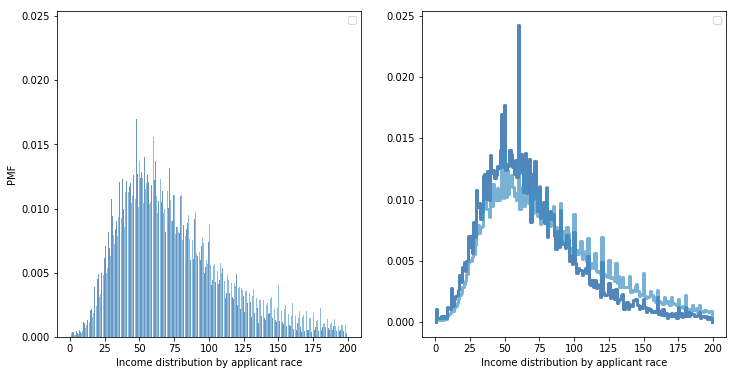

In [172]:
#Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

#Build white PMF
white_pmf = thinkstats2.Pmf(white_df['applicant_income_000s'])
black_pmf = thinkstats2.Pmf(black_df['applicant_income_000s'])

white_pmf.Normalize()
black_pmf.Normalize()

width=0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(black_pmf, align='right', width=width)
thinkplot.Hist(white_pmf, align='left', width=width)
thinkplot.Config(xlabel='Income distribution by applicant race', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([black_pmf, white_pmf])
thinkplot.Config(xlabel='Income distribution by applicant race')

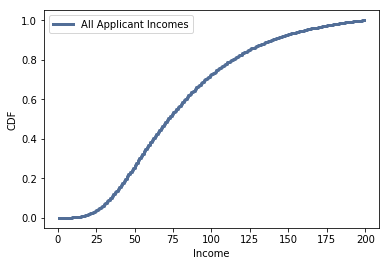

In [175]:
#Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
cdf = thinkstats2.Cdf(clean_df.applicant_income_000s, label='All Applicant Incomes')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Income', ylabel='CDF', loc='upper left')

#See analysis on comparison CDF below

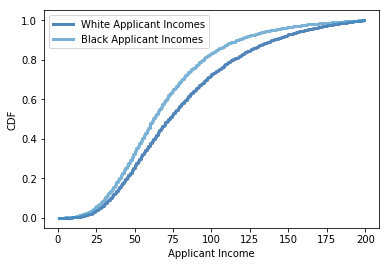

In [176]:
#Comparing black and white income CDFs
first_cdf = thinkstats2.Cdf(white_df.applicant_income_000s, label='White Applicant Incomes')
other_cdf = thinkstats2.Cdf(black_df.applicant_income_000s, label='Black Applicant Incomes')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Applicant Income', ylabel='CDF')

#Analysis--The greatest spread between black and white income CDFs occurs between $75-$125K annual incomes, implying that a 
#black applicant had to be higher up in the earning percentile to acheive this income than a white applicant (it is more 
#unusual for black applicants to achieve these incomes than white applicants.

n, mean, std 259616 79.45594755211772 38.53787181242772


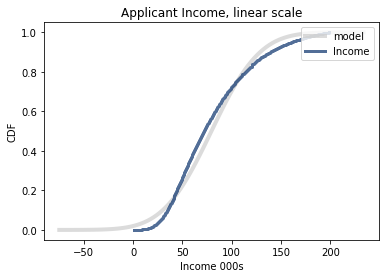

In [179]:
#Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).
#Lognormal model

df = clean_df
weights = df.applicant_income_000s.dropna()#Applicant income, not weights

def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='Income')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)


MakeNormalModel(weights)
thinkplot.Config(title='Applicant Income, linear scale', xlabel='Income 000s',
                 ylabel='CDF', loc='upper right')

#Analysis: The model is a reasonably good fit for predicting applicant income, particularly in the $50-$125K income range


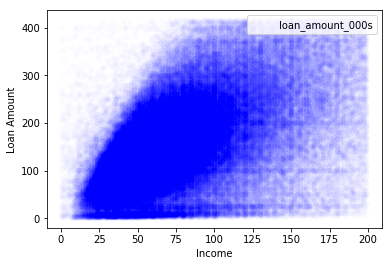

<Figure size 576x432 with 0 Axes>

In [186]:
#Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

#Scatter plot 1--white income to loan amount chart (would expect a higher income to seek a larger loan)
thinkplot.Scatter(white_df.applicant_income_000s, white_df.loan_amount_000s, alpha=0.01)
thinkplot.Show(xlabel='Income', ylabel='Loan Amount')

#Analysis: Outliers abound, but the strong concentration of linearly shaped points indicates that the hypothesis holds true

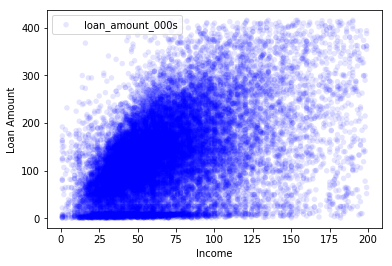

<Figure size 576x432 with 0 Axes>

In [188]:
#Scatter plot 2--Black income to loan amount chart (would expect a higher income to seek a larger loan)
thinkplot.Scatter(black_df.applicant_income_000s, black_df.loan_amount_000s, alpha=0.1)
thinkplot.Show(xlabel='Income', ylabel='Loan Amount')

#Analysis: The alpha was adjusted on this chart to make it more comperable to the white chart above (fewer data points
# made the pattern harder to see, otherwise)  The same linear pattern is observed for black applicants as for white

In [194]:
#Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

#Testing correlation
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    

data = clean_df.applicant_income_000s.values, clean_df.loan_amount_000s.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

#Analysis--for all applicants there appears to be no correlation (p-value = 0) between loan amount and applicant income
#Repeating the same test for black and white applicant subsets yields the same result
#This is surprising--fromt he graphs above there appears to be a linear relationship between income and loan amount



0.0

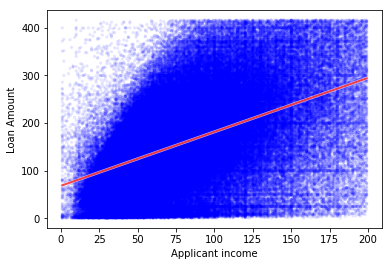

In [198]:
#For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

#Least squares fit
from thinkstats2 import Mean, MeanVar, Var, Std, Cov



def LeastSquares(xs, ys):
    meanx, varx = MeanVar(clean_df.applicant_income_000s)
    meany = Mean(clean_df.loan_amount_000s)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

inter, slope = LeastSquares(clean_df.applicant_income_000s, clean_df.loan_amount_000s)
inter, slope

fit_xs, fit_ys = FitLine(clean_df.applicant_income_000s, inter, slope)


thinkplot.Scatter(clean_df.applicant_income_000s, clean_df.loan_amount_000s, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Applicant income",
                 ylabel='Loan Amount',
                 legend=False)
